# <h1 align=center><font size="5">  Capstone Project - Car accident severity </font></h1>

## A.introduction

The effective treatment of road accidents and thus the enhancment of road safety is a major concern to societies, due to the losses in human lives and the economic and social cost.  

The Seattle government try find the best solution to prevent avoidable accident by warn drivers to be more careful in critical situation by given weather, road conditions about the possibility of you getting into a car accident and how severe it would be, so that you would drive more carefully, we will handle with many attribute it could help us to avoid this accident,There could be some tendencies of driving habit with day of week that could help us know about factors impacting the collisions better. (For Example, people tend to drink on friday or saturday night, drunk people loves to speeding, speeding lead to collisions).  

The main purpose for the project to provide advices for target audience such as police , rescue group ,insurance companies and drivers themselves to make insightful decision it could help to reducing accident and accident severity.


## B.Data Description


### B.1.Data acquisition 

The Data provided by Seattle Police Department  and  Traffic Records department from 2004 to Present, in total there are 37 attribute (independent variables ) , The dependent variable (SEVERITYCODE) contains numbers of the correspond to different level of severity caused by accident from 0 to 4 , are as follows:

 0: Little to no Probability (Clear Condition)\   
 
 1: very low probability (Chance or property damage)\  
 
 2: low probability (Chance of injury)\  
 
 3: Mid probability (Chance of serious injury)\  
 
 4: High probability (Chance of fatality)\  
 
Some attribute have missing data, have numerical and categorical types of data need for preprocessing before any future processing.


### B.2.Data Preprocessing 



The dataset consist 194,674 rows and 37 columns (attributes), we also noticed the original dataset is not ready for data analysis, first we will check data type of every column, then we will drop columns which is not required, in my case I will choose four attributes to solve the problem which is (SEVERITYCODE,WEATHER, ROADCOND,LIGHTCOND), and also we have categorical data type we have to convert it to numerical data type and numerical type.\
Also we noticed that data imbalanced so we will use some statistical method to balance it.


## C.Methodology 


In this project our direct our effort to find proper way to provide advices for target audience and help them to make insightful decision that could help them to reducing accident severity.  

So first I chose my target variables is severity code which describes the fatality of an accident. 
Then I choose three main conditions that could causes accident to train our model and then we will find out the relation between these conditions and severity code.  

As we noticed before that we have categorical data that we have to transform it to numeric data so I convert the columns to a category, then I used those category values for my label encoding.

Also we have unbalanced data so we should balance it to improve the predictability of your model so i applied Random Over sampling  by adding more copies to the minority class.


## C.Analysis <a name="analysis"></a>

In [1]:
import pandas as pd

In [2]:
df_collision=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_collision.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df=df_collision[['SEVERITYCODE','ROADCOND','LIGHTCOND','WEATHER']]

In [5]:
df.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
0,2,Wet,Daylight,Overcast
1,1,Wet,Dark - Street Lights On,Raining
2,1,Dry,Daylight,Overcast
3,1,Dry,Daylight,Clear
4,2,Wet,Daylight,Raining


In [6]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.countplot(df['SEVERITYCODE'])
g.set_xticklabels(['very low probability',' low probability'])
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
class_count_1, class_count_2 = df['SEVERITYCODE'].value_counts()
class_1 = df[df['SEVERITYCODE'] == 1]
class_2 = df[df['SEVERITYCODE'] == 2]# print the shape of the class
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)

class 1: (136485, 4)
class 2: (58188, 4)


total class of 1 and 0: 2    136485
1    136485
Name: SEVERITYCODE, dtype: int64


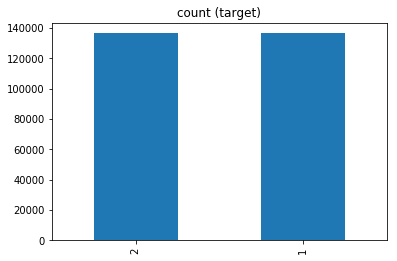

In [9]:
class_2_over = class_2.sample(class_count_1, replace=True)

df_over = pd.concat([class_2_over, class_1], axis=0)

print("total class of 1 and 0:",df_over['SEVERITYCODE'].value_counts())# plot the count after under-sampeling
df_over['SEVERITYCODE'].value_counts().plot(kind='bar', title='count (target)')

In [10]:
df_over['SEVERITYCODE'].value_counts()

2    136485
1    136485
Name: SEVERITYCODE, dtype: int64

In [11]:
df_over.dtypes

SEVERITYCODE     int64
ROADCOND        object
LIGHTCOND       object
WEATHER         object
dtype: object

In [12]:
df_over['ROADCOND'].value_counts().isnull()

Dry               False
Wet               False
Unknown           False
Ice               False
Snow/Slush        False
Other             False
Standing Water    False
Sand/Mud/Dirt     False
Oil               False
Name: ROADCOND, dtype: bool

In [13]:
df_over['LIGHTCOND'].value_counts().isnull()

Daylight                    False
Dark - Street Lights On     False
Unknown                     False
Dusk                        False
Dawn                        False
Dark - No Street Lights     False
Dark - Street Lights Off    False
Other                       False
Dark - Unknown Lighting     False
Name: LIGHTCOND, dtype: bool

In [14]:
df_over['WEATHER'].value_counts().isnull()

Clear                       False
Raining                     False
Overcast                    False
Unknown                     False
Snowing                     False
Other                       False
Fog/Smog/Smoke              False
Sleet/Hail/Freezing Rain    False
Blowing Sand/Dirt           False
Severe Crosswind            False
Partly Cloudy               False
Name: WEATHER, dtype: bool

In [15]:
df_over["ROADCOND"] = df_over["ROADCOND"].astype('category')
df_over.dtypes

SEVERITYCODE       int64
ROADCOND        category
LIGHTCOND         object
WEATHER           object
dtype: object

In [16]:
df_over["ROADCOND_cat"] = df_over["ROADCOND"].cat.codes
df_over.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,ROADCOND_cat
32859,2,Dry,Daylight,Overcast,0
182262,2,Wet,Dark - Street Lights On,Raining,8
174105,2,Wet,Dark - Street Lights On,Raining,8
97872,2,Dry,Daylight,Clear,0
147987,2,Dry,Daylight,Clear,0


In [17]:
df_over["LIGHTCOND"] = df_over["LIGHTCOND"].astype('category')
df_over.dtypes

SEVERITYCODE       int64
ROADCOND        category
LIGHTCOND       category
WEATHER           object
ROADCOND_cat        int8
dtype: object

In [18]:
df_over["LIGHCOND_cat"] = df_over["LIGHTCOND"].cat.codes
df_over.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,ROADCOND_cat,LIGHCOND_cat
32859,2,Dry,Daylight,Overcast,0,5
182262,2,Wet,Dark - Street Lights On,Raining,8,2
174105,2,Wet,Dark - Street Lights On,Raining,8,2
97872,2,Dry,Daylight,Clear,0,5
147987,2,Dry,Daylight,Clear,0,5


In [ ]:
df_over["WEATHER"] = df_over["WEATHER"].astype('category')
df_over.dtypes

SEVERITYCODE       int64
ROADCOND        category
LIGHTCOND       category
WEATHER         category
ROADCOND_cat        int8
LIGHCOND_cat        int8
dtype: object

In [ ]:
df_over["WEATHER_cat"] = df_over["WEATHER"].cat.codes
df_over.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,ROADCOND_cat,LIGHCOND_cat,WEATHER_cat
32859,2,Dry,Daylight,Overcast,0,5,4
182262,2,Wet,Dark - Street Lights On,Raining,8,2,6
174105,2,Wet,Dark - Street Lights On,Raining,8,2,6
97872,2,Dry,Daylight,Clear,0,5,1
147987,2,Dry,Daylight,Clear,0,5,1


## C.1.Realtion between weather and accident severity

In [ ]:
df_weather = df_over[['SEVERITYCODE','WEATHER',]]
df_weather.head()

,SEVERITYCODE,WEATHER
32859,2,Overcast
182262,2,Raining
174105,2,Raining
97872,2,Clear
147987,2,Clear


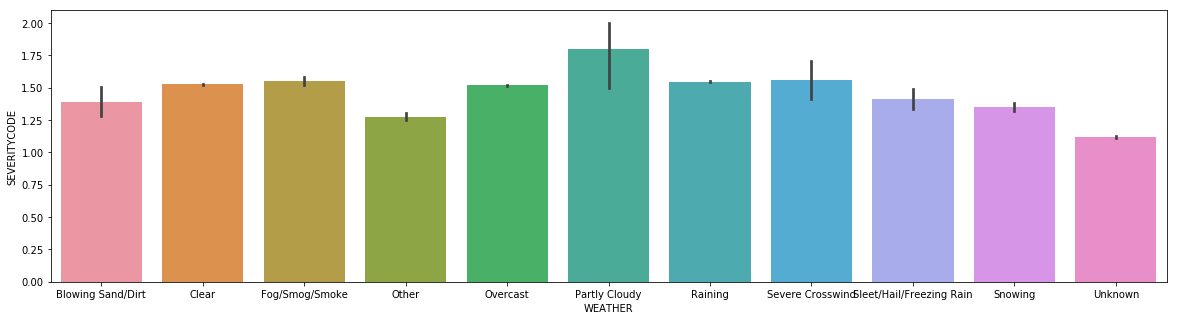

In [ ]:

plt.figure(figsize=(20,5))
sns.barplot(
    data=df_weather,
    x='WEATHER',
    y='SEVERITYCODE')

## C.2.Relation between ROADCOND and accident severity

In [ ]:
df_road=df_over[['ROADCOND','SEVERITYCODE']]

In [ ]:
df_road.head()

,ROADCOND,SEVERITYCODE
32859,Dry,2
182262,Wet,2
174105,Wet,2
97872,Dry,2
147987,Dry,2


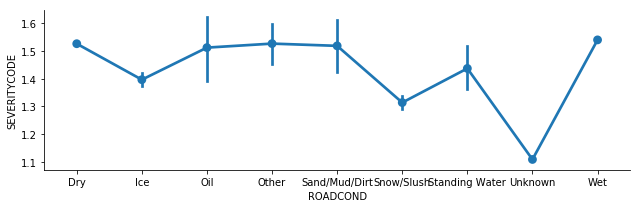

In [ ]:

sns.catplot(x="ROADCOND", y="SEVERITYCODE", kind="point", data=df_road,height=3, 
    aspect=3,)



## C.2.Relation between Lightcond and accident severity

In [ ]:
df_light=df_over[['LIGHTCOND','SEVERITYCODE']]
df_light.head()

,LIGHTCOND,SEVERITYCODE
32859,Daylight,2
182262,Dark - Street Lights On,2
174105,Dark - Street Lights On,2
97872,Daylight,2
147987,Daylight,2


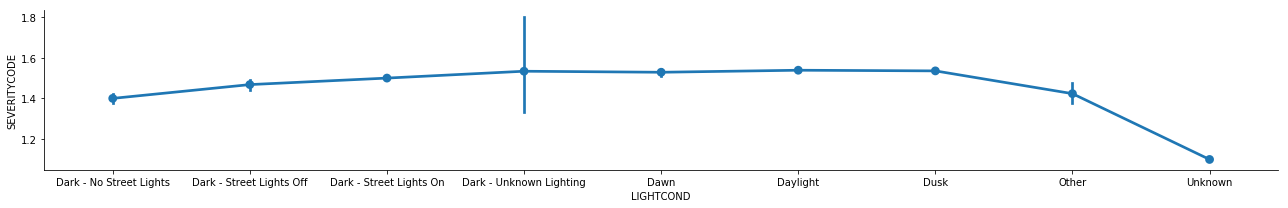

In [ ]:
sns.catplot(x="LIGHTCOND", y="SEVERITYCODE", kind="point", data=df_light,height=3, 
    aspect=6)



## D. Predictive Modeling

## D.1.KNN

In [ ]:
df_over.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,ROADCOND_cat,LIGHCOND_cat,WEATHER_cat
32859,2,Dry,Daylight,Overcast,0,5,4
182262,2,Wet,Dark - Street Lights On,Raining,8,2,6
174105,2,Wet,Dark - Street Lights On,Raining,8,2,6
97872,2,Dry,Daylight,Clear,0,5,1
147987,2,Dry,Daylight,Clear,0,5,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fee920630>]],
      dtype=object)

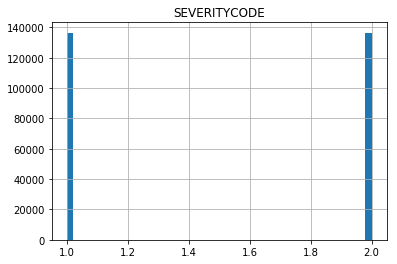

In [ ]:
df_over.hist(column='SEVERITYCODE', bins=50)

In [ ]:
X = df_over[['ROADCOND_cat', 'LIGHCOND_cat','WEATHER_cat']] .values
X[0:5]

array([[0, 5, 4],
       [8, 2, 6],
       [8, 2, 6],
       [0, 5, 1],
       [0, 5, 1]], dtype=int8)

In [ ]:
y = df_over['SEVERITYCODE'].values
y[0:5]

array([2, 2, 2, 2, 2])

In [ ]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.67185316,  0.42656652,  0.41739825],
       [ 1.52607927, -1.2226299 ,  1.14697455],
       [ 1.52607927, -1.2226299 ,  1.14697455],
       [-0.67185316,  0.42656652, -0.67696619],
       [-0.67185316,  0.42656652, -0.67696619]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (218376, 3) (218376,)
Test set: (54594, 3) (54594,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 9
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [ ]:
y_hat_KN = neigh.predict(X_test)
y_hat_KN[0:5]

array([2, 1, 2, 1, 1])

In [ ]:
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score


print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat_KN))

knn_jac=jaccard_similarity_score(y_test, y_hat_KN)
print('jac=',knn_jac)
knn_F=f1_score(y_test, y_hat_KN, average='weighted') 
print('F=',knn_F)



Train set Accuracy:  0.5205471297212148
Test set Accuracy:  0.5175110818038612
jac= 0.5175110818038612
F= 0.4844597732183568


In [ ]:
import numpy as np
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.49699601, 0.49662967, 0.49496282, 0.50073268, 0.49862622,
       0.49468806, 0.50353519, 0.51589918, 0.51751108])

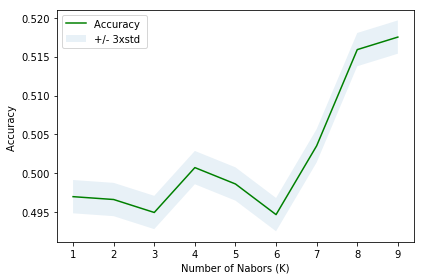

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
print(knn_jac)
print(knn_F)


The best accuracy was with 0.5175110818038612 with k= 9
0.5175110818038612
0.4844597732183568


## D.2. SVM

In [ ]:
df_over.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,ROADCOND_cat,LIGHCOND_cat,WEATHER_cat
32859,2,Dry,Daylight,Overcast,0,5,4
182262,2,Wet,Dark - Street Lights On,Raining,8,2,6
174105,2,Wet,Dark - Street Lights On,Raining,8,2,6
97872,2,Dry,Daylight,Clear,0,5,1
147987,2,Dry,Daylight,Clear,0,5,1


In [ ]:
import numpy as np
feature_df = df_over[['ROADCOND_cat','LIGHCOND_cat','WEATHER_cat']].astype('int')
X1 = np.asarray(feature_df)
X[0:5]

array([[-0.67185316,  0.42656652,  0.41739825],
       [ 1.52607927, -1.2226299 ,  1.14697455],
       [ 1.52607927, -1.2226299 ,  1.14697455],
       [-0.67185316,  0.42656652, -0.67696619],
       [-0.67185316,  0.42656652, -0.67696619]])

In [ ]:
df_over['SEVERITYCODE'] = df_over['SEVERITYCODE'].astype('int')
y1 = np.asarray(df_over['SEVERITYCODE'])
y [0:5]

array([2, 2, 2, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X1, y1, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (218376, 3) (218376,)
Test set: (54594, 3) (54594,)


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
yhat1 = clf.predict(X_test)
yhat1 [0:5]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print('done')

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['low(1)','Hight(2)'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn.metrics import f1_score
svm_f1=f1_score(y_test, yhat1, average='weighted') 
print(svm_f1)

In [ ]:
from sklearn.metrics import jaccard_similarity_score
svm_jac=jaccard_similarity_score(y_test, yhat1)
print(svm_jac)

### D.3.Logistic Regression

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
print('done')

In [ ]:
df_over.head()

In [ ]:
df_over=df_over[['SEVERITYCODE','ROADCOND_cat','LIGHCOND_cat','WEATHER_cat']].astype('int')


In [ ]:
X2= np.asarray(df_over[['ROADCOND_cat','LIGHCOND_cat','WEATHER_cat']])
X2[0:5]

In [ ]:
y2 = np.asarray(df_over['SEVERITYCODE'])
y2 [0:5]

In [ ]:
from sklearn import preprocessing
X2 = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X2, y2, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

In [ ]:
yhat = LR.predict(X_test)
yhat

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

In [ ]:
from sklearn.metrics import jaccard_similarity_score
LR_jac=jaccard_similarity_score(y_test, yhat)
print(LR_jac)

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['high=2','low=1'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(y_test, yhat))


In [ ]:
from sklearn.metrics import log_loss
Log_loss=log_loss(y_test, yhat_prob)
print(Log_loss)

In [ ]:
from sklearn.metrics import f1_score
LR_f1=f1_score(y_test, yhat, average='weighted') 
print(LR_f1)

In [ ]:
data={'Algorithm':['KNN','SVM','LogisticRegression'],
      'Jaccard':[knn_jac,svm_jac,LR_jac],
      'F1-score':[knn_F,svm_f1,LR_f1],
      'LogisticRegression':[np.nan,np.nan,Log_loss]}

In [ ]:
df=pd.DataFrame(data)
df